In [17]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import stft

### This notebook looks at plotting spectrograms of the data obtained on firth road using the breadboard amplifier
### Most of this data was sampled slowly at 2ksps and the aim of this notebook is to observe the effects of this low sampling rate on the data

## 20km/h Plot Sampled at 2ksps

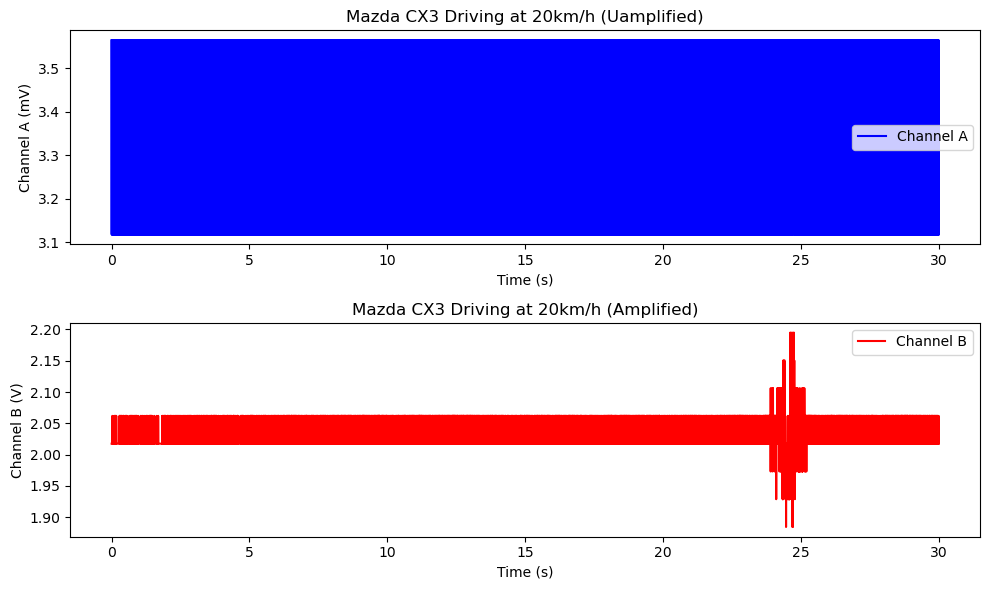

In [18]:
# Initialize lists to store data
time = []
channel_a = []
channel_b = []

# Open the file and read data
with open('20km.txt', 'r') as file:
    # Skip the header line
    next(file)
    next(file)
    next(file)
    
    # Read data line by line
    for line in file:
        parts = line.strip().split('\t')
        time.append(float(parts[0]))
        channel_a.append(float(parts[1]))
        channel_b.append(float(parts[2]))

# Create separate plots for Channel A and Channel B
plt.figure(figsize=(10, 6))

# Plot for Channel A
plt.subplot(2, 1, 1)
plt.plot(time, channel_a, label='Channel A', color='blue')
plt.title('Mazda CX3 Driving at 20km/h (Uamplified)')
plt.xlabel('Time (s)')
plt.ylabel('Channel A (mV)')
plt.legend()

# Plot for Channel B
plt.subplot(2, 1, 2)
plt.plot(time, channel_b, label='Channel B', color='red')
plt.title('Mazda CX3 Driving at 20km/h (Amplified)')
plt.xlabel('Time (s)')
plt.ylabel('Channel B (V)')
plt.legend()

plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()


# Plotting DFT of this data

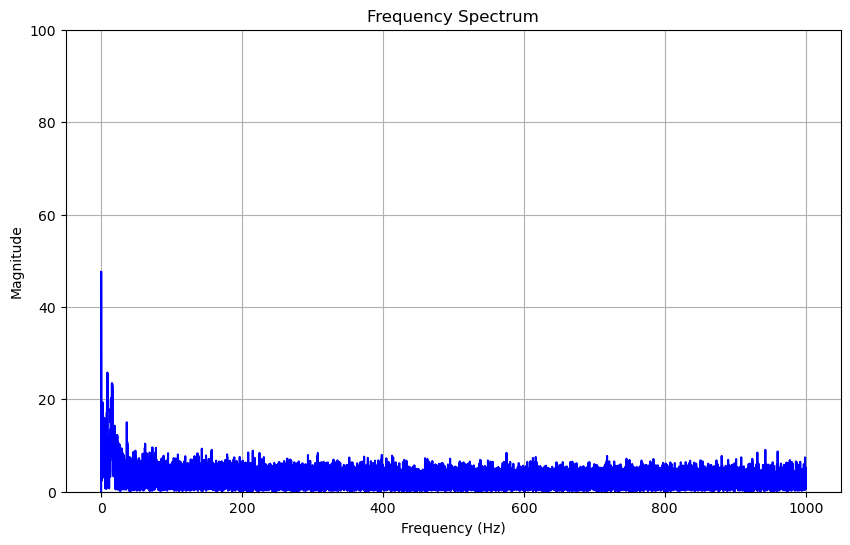

In [19]:
# Sampling frequency (inverse of the time step)
sampling_frequency = 2000

# Perform the FFT
fft_result = np.fft.fft(channel_b)
fft_freqs = np.fft.fftfreq(len(channel_b), 1 / sampling_frequency)

# Calculate the magnitude of the FFT result
fft_magnitude = np.abs(fft_result)
fft_magnitude[0] = 0
# Plot the frequency spectrum
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(fft_freqs[:len(fft_freqs) // 2], fft_magnitude[:len(fft_magnitude) // 2], color='b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.ylim(0,100)
#plt.xlim(0,1000)
plt.title('Frequency Spectrum')
plt.grid(True)

# Show the plot
plt.show()

# Isolating target 

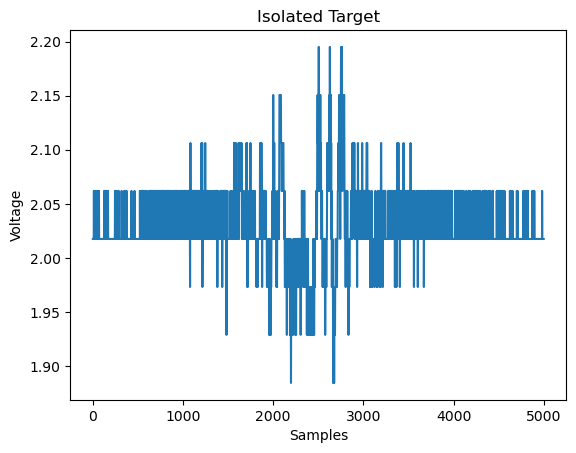

In [20]:
for i in range(len(channel_b)):
    if channel_b[i] > 2.15:
        target = channel_b[i-2000:3000+i]
        
        break
    


plt.plot(target)
plt.title('Isolated Target')
plt.xlabel('Samples')
plt.ylabel('Voltage')
plt.show()  

# Performing DFT of isolated target

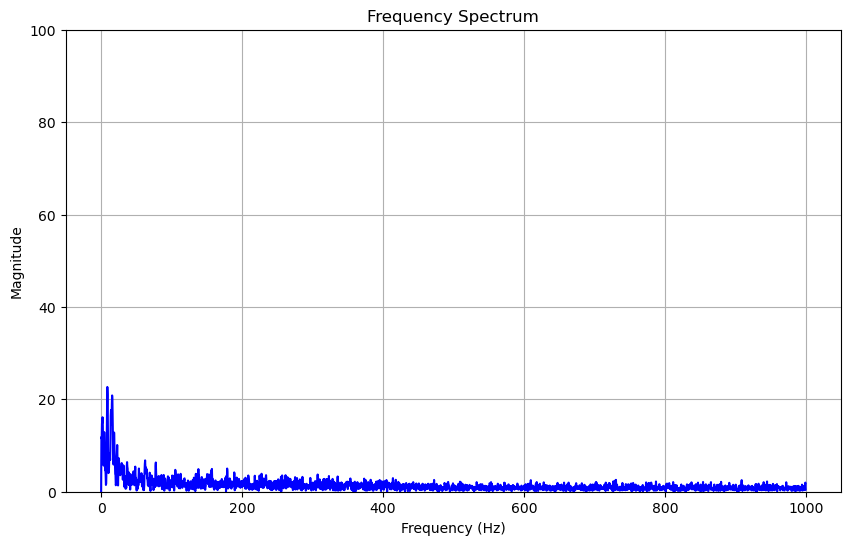

In [21]:
# Sampling frequency (inverse of the time step)
sampling_frequency = 2000

# Perform the FFT
fft_result = np.fft.fft(target)
fft_freqs = np.fft.fftfreq(len(target), 1 / sampling_frequency)

# Calculate the magnitude of the FFT result
fft_magnitude = np.abs(fft_result)
fft_magnitude[0] = 0
# Plot the frequency spectrum
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(fft_freqs[:len(fft_freqs) // 2], fft_magnitude[:len(fft_magnitude) // 2], color='b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.ylim(0,100)
#plt.xlim(0,1000)
plt.title('Frequency Spectrum')
plt.grid(True)

# Show the plot
plt.show()

# Plotting Spectrogram of isolated target

/var/folders/g1/gj5y689n0w5fnjjfvlmbhpgr0000gn/T/ipykernel_3341/2923287542.py:17: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(times, frequencies, 10 * np.log10(np.abs(Sxx)), shading='auto')


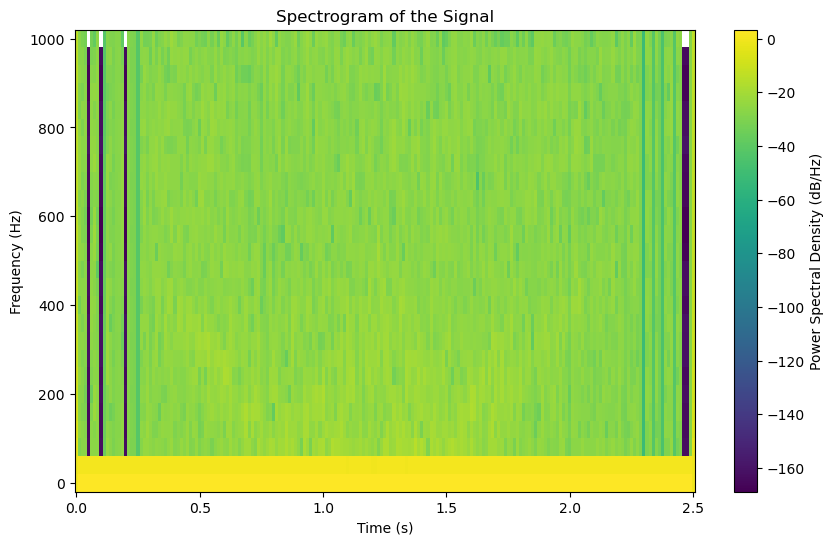

In [22]:
# Define your signal (you can replace this with your actual signal)
# For this example, we'll generate a simple sinusoidal signal.
sample_rate = 2000  # Sample rate in Hz
signal = target

# Define parameters for the STFT
segment_length = 50  # Number of samples per segment
overlap = 25  # Overlap between segments (adjust as needed)
nperseg = segment_length
noverlap = overlap

# Compute the spectrogram in 50-sample segments
frequencies, times, Sxx = stft(signal, fs=sample_rate, nperseg=nperseg, noverlap=noverlap)

# Plot the spectrogram
plt.figure(figsize=(10, 6))
plt.pcolormesh(times, frequencies, 10 * np.log10(np.abs(Sxx)), shading='auto')
plt.colorbar(label='Power Spectral Density (dB/Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram of the Signal')
plt.show()
